In [50]:
import xarray as xr
import pandas as pd
import numpy as np
import datetime
from datetime import datetime, date
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#Load model SIE data and group by region
filepath = '/home/disk/sipn/mcmcgraw/data/VRILE/intermediate_data/'
model_name = 'ecmwfsipn'
model_type = 'reforecast'
day_change = 5
max_lead = 30

filename = 'MOVING_{model_name}_{model_type}_d_SIC_{day_change}day_change_lead_time_1{max_lead}days_ALL_REGIONS_ALL_ENS.csv'.format(model_name=model_name,
                                                                                                                                 model_type=model_type,
                                                                                                                                 day_change=day_change,
                                                                                                                                 max_lead=max_lead)

ds_SIC_all = pd.read_csv(filepath+filename)
regions = ds_SIC_all['region']
region_names = ds_SIC_all['region'].unique().tolist()

In [134]:
reg_sel_ind = 7
region_sel = region_names[reg_sel_ind]

d_SIC_reg = ds_SIC_all.groupby(['region'])
d_SIC_ireg = d_SIC_reg.get_group(region_sel)
d_SIC_ireg['I (init date)'] = pd.to_datetime(d_SIC_ireg['I (init date)'])
init_date = pd.DatetimeIndex(d_SIC_ireg['I (init date)'])
d_SIC_ireg['V (valid date)'] = pd.to_datetime(d_SIC_ireg['V (valid date)'])
valid_date = pd.DatetimeIndex(d_SIC_ireg['V (valid date)'])
dSI = d_SIC_ireg['d_SIC (V - I)']
month_ind = [6,7,8,9]
valid_dates_sel = valid_date.month.isin(month_ind)
#init_dates_sel = init_date.month.isin(month_ind)
dSI_sel = dSI[valid_dates_sel]

/home/disk/sipn/mcmcgraw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/disk/sipn/mcmcgraw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


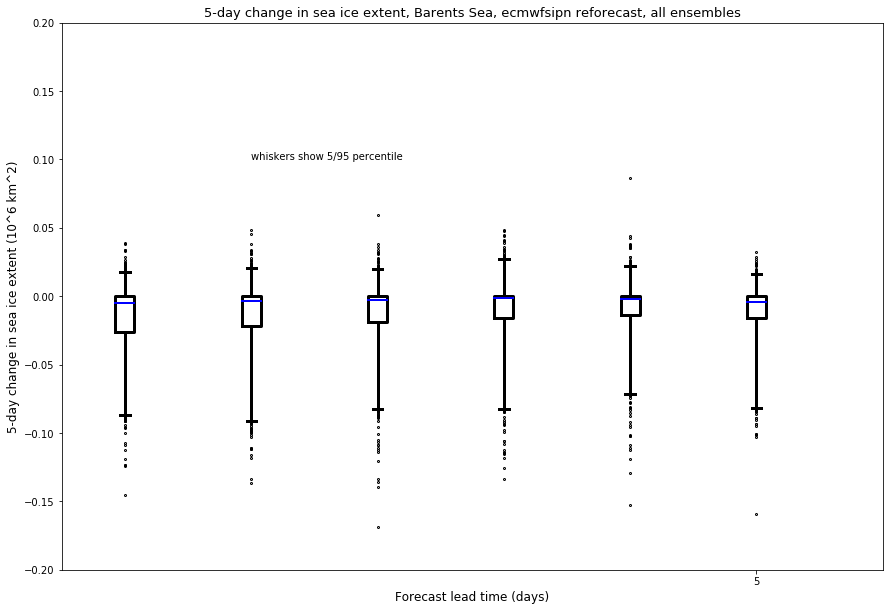

In [139]:
lead_days = valid_date[valid_dates_sel] - init_date[valid_dates_sel]
SIE_lead = pd.DataFrame(columns=['d_SIE','lead_days'])
SIE_lead.loc[:,'d_SIE'] = dSI_sel
SIE_lead.loc[:,'lead_days'] = lead_days
#print(SIE_lead)
#Group by lead day
#poo = pd.Timedelta(days=5)
#print(poo)
SIE_lead_days = SIE_lead.groupby(['lead_days'])
#print(lead_days)
lead_skip = 5
lead_days_vec = np.arange(5,max_lead+1,lead_skip)
#print(lead_days_vec)
fig1 = plt.figure()
ax1 = fig1.add_axes([0.1,0.1,1.9,1.9])
medianprops = {'color': 'blue', 'linewidth': 2}
boxprops = {'color': 'black','linestyle':'-', 'linewidth': 3}
whiskerprops = {'color': 'black', 'linestyle': '-', 'linewidth': 3}
capprops = {'color': 'black', 'linestyle': '-', 'linewidth': 3}
flierprops = {'color': 'black', 'marker': 'o', 'markersize': 1, 'markeredgewidth': 2}
for iday in np.arange(0,len(lead_days_vec)):
    lead_days_groups = SIE_lead_days.get_group(pd.Timedelta(days=lead_days_vec[iday]))
    SIE_by_lead = lead_days_groups['d_SIE']
    ax1.boxplot(SIE_by_lead.dropna().values, positions=[iday],flierprops=flierprops,whis=[1,99],
               medianprops=medianprops,boxprops=boxprops,whiskerprops=whiskerprops,
               capprops=capprops)
    
ax1.set_ylim([-0.2,0.2])
ax1.set_xlim([-0.5,len(lead_days_vec)])#ax1.set_xticks(np.arange(0,len(lead_days_vec)))
ax1.set_xticklabels(lead_days_vec)
ax1.set_xlabel('Forecast lead time (days)',fontsize=12)
ax1.set_ylabel('5-day change in sea ice extent (10^6 km^2)',fontsize=12)
ax1.set_title('5-day change in sea ice extent, {region}, {model_name} {model_type}, all ensembles'.format(region=region_sel,
                                                                                          model_name=model_name,
                                                                                          model_type=model_type),fontsize=13)
ax1.text(1,0.1,'whiskers show 5/95 percentile')
plt.show()
#print(SIE_by_lead)

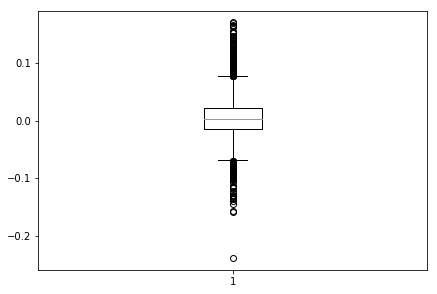